In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV

In [21]:
df = pd.read_csv('./1980_2014_november.csv').drop(['Alphanumeric_State_Code',
                                                   'ICPSR_State_Code',
                                                  'Overseas_Eligible'], axis=1)

In [24]:
df[df.isnull().any(axis=1)]

Year                 State  Turnout_Rates_VEP_Total_Ballots_Counted  \
25   2014           Mississippi                                      NaN   
32   2014            New Mexico                                      NaN   
44   2014                 Texas                                      NaN   
53   2012               Alabama                                      NaN   
60   2012              Delaware                                      NaN   
77   2012           Mississippi                                      NaN   
78   2012              Missouri                                      NaN   
89   2012              Oklahoma                                      NaN   
91   2012          Pennsylvania                                      NaN   
92   2012          Rhode Island                                      NaN   
96   2012                 Texas                                      NaN   
101  2012         West Virginia                                      NaN   
102  2012             Wisconsin                                      NaN   
129  2010           Mississippi                                      NaN   
163  2008           Connecticut                                      NaN   
181  2008           Mississippi                                      NaN   
200  2008                 Texas                                      NaN   
209  2006               Alabama                                      NaN   
228  2006                 Maine                                      NaN   
233  2006           Mississippi                                      NaN   
245  2006              Oklahoma                                      NaN   
247  2006          Pennsylvania                                      NaN   
252  2006                 Texas                                      NaN   
285  2004           Mississippi                                      NaN   
297  2004              Oklahoma                                      NaN   
299  2004          Pennsylvania                                      NaN   
304  2004                 Texas                                      NaN   
313  2002               Alabama                                      NaN   
320  2002              Delaware                                      NaN   
321  2002  District of Columbia                                      NaN   
..    ...                   ...                                      ...   
851  1982             Louisiana                                      NaN   
852  1982                 Maine                                      NaN   
857  1982           Mississippi                                      NaN   
858  1982              Missouri                                      NaN   
866  1982        North Carolina                                      NaN   
871  1982          Pennsylvania                                      NaN   
874  1982          South Dakota                                      NaN   
875  1982             Tennessee                                      NaN   
876  1982                 Texas                                      NaN   
879  1982              Virginia                                      NaN   
881  1982         West Virginia                                      NaN   
882  1982             Wisconsin                                      NaN   
884  1980         United States                                      0.0   
885  1980               Alabama                                      NaN   
888  1980              Arkansas                                      NaN   
894  1980               Florida                                      NaN   
895  1980               Georgia                                      NaN   
901  1980                Kansas                                      NaN   
902  1980              Kentucky                                      NaN   
903  1980             Louisiana                                      NaN   
904  1980                 Maine                      

In [25]:
df.isna().sum()

Year                                             0
State                                            0
Turnout_Rates_VEP_Total_Ballots_Counted        215
Turnout_Rates_VEP_Highest_Office                 1
Turnout_Rates_VAP_Highest_Office                 1
Numerators_Total_Ballots_Counted               223
Numerators_Highest_Office                        1
Denominators_Voting_Eligible_Population_VEP      0
Denominators_Voting_Age_Population_VAP_          0
Non_citizen                                      0
Prison                                           0
Probation                                        0
Parole                                           0
Total_Ineligible_Felon                           0
dtype: int64

In [26]:
df = df.drop(['Turnout_Rates_VEP_Total_Ballots_Counted', 'Numerators_Total_Ballots_Counted'], axis=1)

In [27]:
df.isna().sum()

Year                                           0
State                                          0
Turnout_Rates_VEP_Highest_Office               1
Turnout_Rates_VAP_Highest_Office               1
Numerators_Highest_Office                      1
Denominators_Voting_Eligible_Population_VEP    0
Denominators_Voting_Age_Population_VAP_        0
Non_citizen                                    0
Prison                                         0
Probation                                      0
Parole                                         0
Total_Ineligible_Felon                         0
dtype: int64

In [30]:
df.dropna(inplace=True)

In [49]:
usa_drop = list(df[df.State == 'United States'].index)
usa_drop += list(df[df.State == 'United States (Excl. Louisiana)'].index)

In [50]:
df.drop(index=usa_drop, inplace=True)

In [51]:
df.groupby('State').mean().sort_values('Total_Ineligible_Felon', ascending=False)

Year  Turnout_Rates_VEP_Highest_Office  \
State                                                                 
Texas                 1997.000000                         41.505556   
California            1997.000000                         49.305556   
Georgia               1997.000000                         41.372222   
Florida               1997.000000                         48.633333   
New York              1997.000000                         45.622222   
New Jersey            1997.000000                         48.094444   
North Carolina        1997.000000                         44.255556   
Maryland              1997.000000                         49.272222   
Washington            1997.000000                         53.538889   
Missouri              1997.000000                         51.311111   
Arizona               1997.000000                         43.716667   
Louisiana             1997.882353                         48.547059   
Minnesota             1997.000000                         64.588889   
Virginia              1997.000000                         44.988889   
Tennessee             1997.000000                         42.333333   
Alabama               1997.000000                         46.666667   
Wisconsin             1997.000000                         57.688889   
South Carolina        1997.000000                         40.883333   
Ohio                  1997.000000                         51.111111   
Michigan              1997.000000                         52.777778   
Illinois              1997.000000                         50.188889   
Oklahoma              1997.000000                         45.994444   
Kentucky              1997.000000                         44.166667   
Pennsylvania          1997.000000                         47.294444   
Arkansas              1997.000000                         45.888889   
Connecticut           1997.000000                         54.372222   
Mississippi           1997.000000                         41.844444   
Indiana               1997.000000                         45.794444   
Iowa                  1997.000000                         56.577778   
Colorado              1997.000000                         54.138889   
Nevada                1997.000000                         42.811111   
Idaho                 1997.000000                         54.761111   
Delaware              1997.000000                         48.933333   
New Mexico            1997.000000                         47.122222   
Kansas                1997.000000                         51.133333   
Nebraska              1997.000000                         52.783333   
Oregon                1997.000000                         58.677778   
Rhode Island          1997.000000                         52.466667   
West Virginia         1997.000000                         40.866667   
Alaska                1997.000000                         58.505556   
District of Columbia  1997.000000                         41.266667   
Massachusetts         1997.000000                         54.761111   
Hawaii                1997.000000                         45.022222   
Wyoming               1997.000000                         54.505556   
Utah                  1997.000000                         49.016667   
South Dakota          1997.000000                         59.288889   
Montana               1997.000000                         58.744444   
New Hampshire         1997.000000                         52.044444   
North Dakota          1997.000000                         56.027778   
Vermont               1997.000000                         55.794444   
Maine                 1997.000000                         61.216667   

                      Turnout_Rates_VAP_Highest_Office  \
State                                                    
Texas                                        36.450000   
California                                   40.688889   
Georgia                          

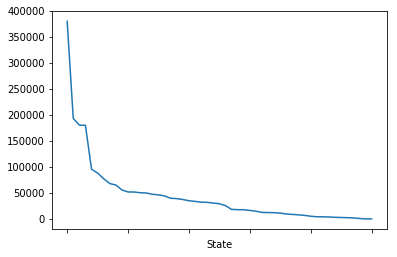

In [54]:
df.groupby('State').mean().sort_values('Total_Ineligible_Felon', ascending=False)['Total_Ineligible_Felon'].plot()

In [55]:
df.head()

Year       State  Turnout_Rates_VEP_Highest_Office  \
1  2014     Alabama                              32.9   
2  2014      Alaska                              54.2   
3  2014     Arizona                              33.4   
4  2014    Arkansas                              40.1   
5  2014  California                              29.9   

   Turnout_Rates_VAP_Highest_Office  Numerators_Highest_Office  \
1                              31.5                  1180413.0   
2                              51.0                   282382.0   
3                              29.5                  1506416.0   
4                              37.5                   848592.0   
5                              24.7                  7317581.0   

   Denominators_Voting_Eligible_Population_VEP  \
1                                      3588783   
2                                       520562   
3                                      4510186   
4                                      2117881   
5                                     24440416   

   Denominators_Voting_Age_Population_VAP_  Non_citizen  Prison  Probation  \
1                                  3751844          2.5   31691      53640   
2                                   553473          3.9    5216       7077   
3                                  5110890         10.1   37516      73232   
4                                  2263040          4.0   17756      28192   
5                                 29646675         16.8  136088          0   

   Parole  Total_Ineligible_Felon  
1    8097                   69826  
2    2210                   11389  
3    7502                   86028  
4   21743                   55287  
5   87104                  223192

In [56]:
df.describe()

Year  Turnout_Rates_VEP_Highest_Office  \
count   917.000000                        917.000000   
mean   1997.016358                         49.966739   
std      10.375734                         11.023422   
min    1980.000000                         20.200000   
25%    1988.000000                         41.500000   
50%    1998.000000                         50.100000   
75%    2006.000000                         58.600000   
max    2014.000000                         78.400000   

       Turnout_Rates_VAP_Highest_Office  Numerators_Highest_Office  \
count                        917.000000               9.170000e+02   
mean                          47.381570               1.789052e+06   
std                           10.871416               1.886161e+06   
min                           19.900000               1.176230e+05   
25%                           39.000000               4.840480e+05   
50%                           47.700000               1.221010e+06   
75%                           55.700000               2.233069e+06   
max                           73.900000               1.356190e+07   

       Denominators_Voting_Eligible_Population_VEP  \
count                                 9.170000e+02   
mean                                  3.682748e+06   
std                                   3.826066e+06   
min                                   2.701220e+05   
25%                                   9.872200e+05   
50%                                   2.550887e+06   
75%                                   4.458820e+06   
max                                   2.444042e+07   

       Denominators_Voting_Age_Population_VAP_  Non_citizen         Prison  \
count                             9.170000e+02   917.000000     917.000000   
mean                              3.999921e+06     4.302181   18881.391494   
std                               4.457113e+06     3.657474   27229.083427   
min                               2.772610e+05     0.400000       0.000000   
25%                               1.026160e+06     1.500000    3357.000000   
50%                               2.705468e+06     3.000000    9434.000000   
75%                               4.715129e+06     6.500000   23431.000000   
max                               2.964668e+07    18.900000  175512.000000   

           Probation         Parole  Total_Ineligible_Felon  
count     917.000000     917.000000              917.000000  
mean    34099.351145    7803.324973            44168.162486  
std     71434.981637   18950.863020            71182.993109  
min         0.000000       0.000000                0.000000  
25%         0.000000       0.000000             5955.000000  
50%      7077.000000    1732.000000            20845.000000  
75%     36257.000000    6077.000000            50600.000000  
max    471067.000000  121141.000000           499362.000000

In [57]:
df.columns

Index(['Year', 'State', 'Turnout_Rates_VEP_Highest_Office',
       'Turnout_Rates_VAP_Highest_Office', 'Numerators_Highest_Office',
       'Denominators_Voting_Eligible_Population_VEP',
       'Denominators_Voting_Age_Population_VAP_', 'Non_citizen', 'Prison',
       'Probation', 'Parole', 'Total_Ineligible_Felon'],
      dtype='object')

In [66]:
X = df[['Non_citizen', 'Prison',
       'Probation', 'Parole', 'Total_Ineligible_Felon']]
y = df['Turnout_Rates_VEP_Highest_Office']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [68]:
lr = LinearRegression()

In [69]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
lr.score(X_train, y_train)

0.041376659188719023

In [71]:
lr.score(X_test, y_test)

0.027962120232333243

In [78]:
df[['Non_citizen', 'Prison', 'Probation', 'Parole', 'Total_Ineligible_Felon',
    'Turnout_Rates_VEP_Highest_Office']].corr()

Non_citizen    Prison  Probation    Parole  \
Non_citizen                          1.000000  0.614945   0.305285  0.567588   
Prison                               0.614945  1.000000   0.534978  0.834364   
Probation                            0.305285  0.534978   1.000000  0.500999   
Parole                               0.567588  0.834364   0.500999  1.000000   
Total_Ineligible_Felon               0.541627  0.877240   0.852260  0.833569   
Turnout_Rates_VEP_Highest_Office    -0.104834 -0.146319  -0.103659 -0.128684   

                                  Total_Ineligible_Felon  \
Non_citizen                                     0.541627   
Prison                                          0.877240   
Probation                                       0.852260   
Parole                                          0.833569   
Total_Ineligible_Felon                          1.000000   
Turnout_Rates_VEP_Highest_Office               -0.154234   

                                  Turnout_Rates_VEP_Highest_Office  
Non_citizen                                              -0.104834  
Prison                                                   -0.146319  
Probation                                                -0.103659  
Parole                                                   -0.128684  
Total_Ineligible_Felon                                   -0.154234  
Turnout_Rates_VEP_Highest_Office                          1.000000